# Natural Language Processing (NLP) -- Text mining(2)

Name: Aruna M | Batch Date: 27 Jan 2022

### Web scraping using Beautiful Soup and sentiment analysis

### Business problem: 

Extract reviews of any product from ecommerce website like amazon

 Perform emotion mining

In [1]:
# Importing necessary libraries
from bs4 import BeautifulSoup as bs #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import requests # making HTTP requests in Python

In [2]:
bt='https://www.amazon.in'
ul='https://www.amazon.in/Apple-MacBook-Air-13-3-inch-MQD32HN/product-reviews/B073Q5R6VR/ref=cm_cr_getr_d_paging_btm_next_30?ie=UTF8&reviewerType=all_reviews'

In [3]:
 #define list to store Name of the customers
review_title = []
rate = []
review_content = []

In [4]:
tt = 0
while tt == 0:
    page = requests.get(ul)
    while page.ok == False:#if it fails to connect then this loop will be executing continuously until get response from site  
        page = requests.get(ul)
   

    soup = bs(page.content,'html.parser')
    soup.prettify()       #Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document.
    
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        ul = bt + a
    except:
        break

In [5]:
len(review_title)

10

In [6]:
len(review_content)

10

In [7]:
len(rate)

10

In [8]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [9]:
!pip install -U textblob
!python -m textblob.download_corpora

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word, Blobber
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
nltk.download('stopwords')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

Finished.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
df = pd.DataFrame()

In [11]:

df['Review Title'] = review_title
df['Rating'] = rate
df['Reviews'] = review_content

In [12]:
df

,Review Title,Rating,Reviews
0,Superb,5.0 out of 5 stars,It's amazing..... battery last around 10 -12 h...
1,DEAD after 1 year two months...,1.0 out of 5 stars,We buy macbook's expecting that it will lasts ...
2,My first apple product: fully satisfied- here ...,5.0 out of 5 stars,Best Laptop under 60k. If you don't want any a...
3,Justified Apple Product,5.0 out of 5 stars,Pros:1. Light weight and super fast response t...
4,The sound quality was not good. My laptop star...,1.0 out of 5 stars,Reason for 1 star is I ot an defective piece. ...
5,Dead mac book air,1.0 out of 5 stars,"Bought this product recently on 5 April, was w..."
6,MacBook motherboard and battery collapsed.,1.0 out of 5 stars,I am very upset about the product as I checked...
7,Takes six figure out of your pocket and then d...,1.0 out of 5 stars,"Hi, Think thousand time before buying. One cal..."
8,Perfect product!,4.0 out of 5 stars,I have been a Macbook pro user for last 2 year...
9,Worst product hardwares,1.0 out of 5 stars,Never purchase any Apple products. I bought 3 ...


In [13]:
df.head(10)

,Review Title,Rating,Reviews
0,Superb,5.0 out of 5 stars,It's amazing..... battery last around 10 -12 h...
1,DEAD after 1 year two months...,1.0 out of 5 stars,We buy macbook's expecting that it will lasts ...
2,My first apple product: fully satisfied- here ...,5.0 out of 5 stars,Best Laptop under 60k. If you don't want any a...
3,Justified Apple Product,5.0 out of 5 stars,Pros:1. Light weight and super fast response t...
4,The sound quality was not good. My laptop star...,1.0 out of 5 stars,Reason for 1 star is I ot an defective piece. ...
5,Dead mac book air,1.0 out of 5 stars,"Bought this product recently on 5 April, was w..."
6,MacBook motherboard and battery collapsed.,1.0 out of 5 stars,I am very upset about the product as I checked...
7,Takes six figure out of your pocket and then d...,1.0 out of 5 stars,"Hi, Think thousand time before buying. One cal..."
8,Perfect product!,4.0 out of 5 stars,I have been a Macbook pro user for last 2 year...
9,Worst product hardwares,1.0 out of 5 stars,Never purchase any Apple products. I bought 3 ...


In [14]:
df.to_csv(r'E:fill.csv',index = True)

In [15]:
data = pd.read_csv("E:fill.csv",index_col=[0])

In [16]:
data.dtypes

Review Title    object
Rating          object
Reviews         object
dtype: object

In [17]:
data['Rating'] = [titles.rstrip(' out of 5 stars') for titles in data['Rating']]

In [18]:
data['Rating']


0    5.0
1    1.0
2    5.0
3    5.0
4    1.0
5    1.0
6    1.0
7    1.0
8    4.0
9    1.0
Name: Rating, dtype: object

In [19]:
data['Rating'].value_counts(normalize=True)*100


1.0    60.0
5.0    30.0
4.0    10.0
Name: Rating, dtype: float64

In [20]:
ratings=data.groupby(['Rating']).count()
ratings

,Review Title,Reviews
Rating,,
1.0,6,6
4.0,1,1
5.0,3,3


Text(0, 0.5, 'Count')

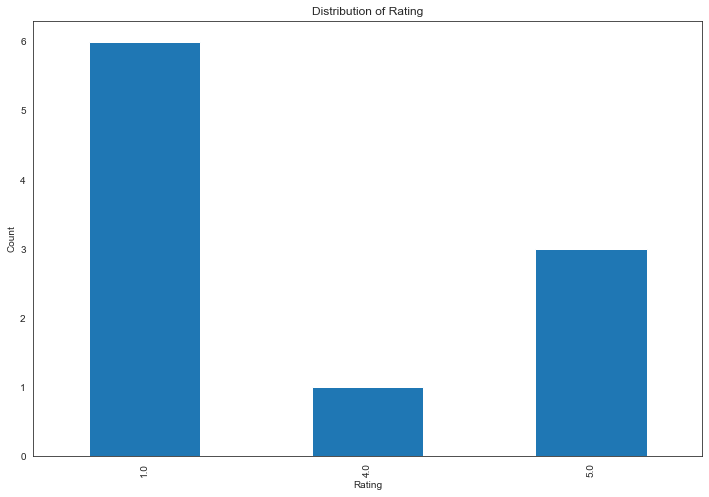

In [21]:
plt.figure(figsize=(12,8))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

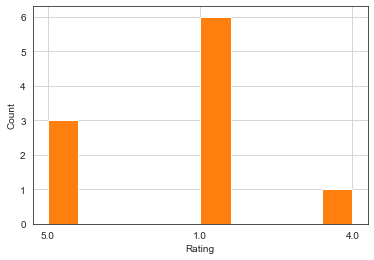

In [22]:
data.Rating.hist()
data.Rating.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')

In [23]:
data.iloc[:,[2]]

,Reviews
0,It's amazing..... battery last around 10 -12 h...
1,We buy macbook's expecting that it will lasts ...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,Reason for 1 star is I ot an defective piece. ...
5,"Bought this product recently on 5 April, was w..."
6,I am very upset about the product as I checked...
7,"Hi, Think thousand time before buying. One cal..."
8,I have been a Macbook pro user for last 2 year...
9,Never purchase any Apple products. I bought 3 ...


In [24]:
Reviews=data.iloc[:,[2]]

In [25]:
Reviews.shape

(10, 1)

In [26]:
Reviews.describe()

,Reviews
count,10
unique,10
top,It's amazing..... battery last around 10 -12 h...
freq,1


In [27]:
Reviews.dtypes

Reviews    object
dtype: object

In [28]:
# removing customer name and reviw title column as they have not that significance in output##
data.drop(["Review Title"],axis=1,inplace=True)

data.head()

,Rating,Reviews
0,5.0,It's amazing..... battery last around 10 -12 h...
1,1.0,We buy macbook's expecting that it will lasts ...
2,5.0,Best Laptop under 60k. If you don't want any a...
3,5.0,Pros:1. Light weight and super fast response t...
4,1.0,Reason for 1 star is I ot an defective piece. ...


In [29]:
data.Reviews.isna().sum()

0

In [30]:
data['Reviews']=data['Reviews'].fillna(" ")

In [31]:
data.Reviews.isna().sum()

0

In [32]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###

data['Reviews']= data['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [33]:
## removing punctuation from review..#
import string
data['Reviews']=data['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [34]:
## Remove Numbers from review...##
data['Reviews']=data['Reviews'].str.replace('[0-9]','')

C:\Users\Aruna\AppData\Local\Temp/ipykernel_7720/836235362.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Reviews']=data['Reviews'].str.replace('[0-9]','')


In [35]:
## removing all stopwords(english)....###
from nltk.corpus import stopwords

In [36]:
stop_words=stopwords.words('english')

In [37]:
data['Reviews']=data['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [38]:
data.head(5)

,Rating,Reviews
0,5.0,amazing battery last around hrsbest laptop stu...
1,1.0,buy macbooks expecting lasts least years case ...
2,5.0,best laptop k dont want accounting softwares l...
3,5.0,pros light weight super fast response time hig...
4,1.0,reason star ot defective piece sound quality g...


In [39]:
from textblob import Word
data['Reviews']= data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Reviews']= data['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [40]:
data['Reviews'].head()

0    amazing battery last around hrsbest laptop stu...
1    buy macbooks expecting last least year case sa...
2    best laptop  dont want accounting software lik...
3    pro light weight super fast response time high...
4    reason star ot defective piece sound quality g...
Name: Reviews, dtype: object

In [41]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['Reviews'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

   accounting  across  acting  actually  adaptor  additional  adjustable  \
0           0       0       0         0        0           0           0   
1           0       0       0         0        0           0           0   
2           1       0       0         0        0           0           0   
3           0       0       0         0        0           0           0   
4           0       0       0         0        0           0           0   
5           0       0       0         0        0           0           0   
6           0       0       0         0        0           0           0   
7           0       0       0         0        0           0           0   
8           0       1       0         1        1           1           1   
9           0       0       1         0        0           0           0   

   adjusts  advantagesi  air  ...  window  wordkeynote  work  working  world  \
0        0            0    0  ...       0            0     0        0      0   
1  

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['Reviews'])
print(TFIDF)

  (0, 75)	0.411115659661628
  (0, 393)	0.411115659661628
  (0, 217)	0.22069849080565593
  (0, 190)	0.411115659661628
  (0, 22)	0.3494858702302182
  (0, 218)	0.3057588387450205
  (0, 34)	0.24412904931361076
  (0, 10)	0.411115659661628
  (1, 333)	0.22853833988516417
  (1, 110)	0.22853833988516417
  (1, 291)	0.19427846816021163
  (1, 204)	0.22853833988516417
  (1, 388)	0.22853833988516417
  (1, 437)	0.19427846816021163
  (1, 119)	0.1699707023311054
  (1, 45)	0.1699707023311054
  (1, 336)	0.45707667977032834
  (1, 92)	0.3399414046622108
  (1, 350)	0.22853833988516417
  (1, 65)	0.22853833988516417
  (1, 452)	0.1699707023311054
  (1, 221)	0.19427846816021163
  (1, 138)	0.22853833988516417
  (1, 240)	0.22853833988516417
  (1, 54)	0.1699707023311054
  :	:
  (9, 387)	0.16719398313728517
  (9, 435)	0.16719398313728517
  (9, 314)	0.33438796627457035
  (9, 320)	0.16719398313728517
  (9, 264)	0.16719398313728517
  (9, 188)	0.1421301605053999
  (9, 81)	0.1421301605053999
  (9, 253)	0.142130160505399

## Word Cloud

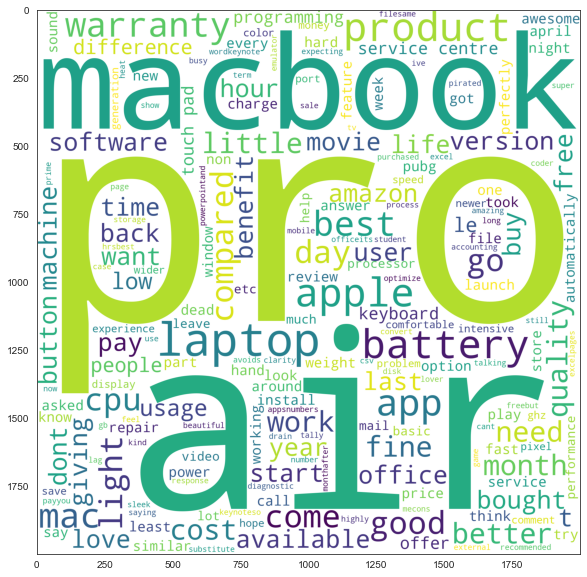

In [43]:
Review_wordcloud = ' '.join(data['Reviews'])
Q_wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

## Removing Punctuations


The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [44]:
data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')
data['Reviews'].head()

C:\Users\Aruna\AppData\Local\Temp/ipykernel_7720/2640507917.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')


0    amazing battery last around hrsbest laptop stu...
1    buy macbooks expecting last least year case sa...
2    best laptop  dont want accounting software lik...
3    pro light weight super fast response time high...
4    reason star ot defective piece sound quality g...
Name: Reviews, dtype: object

## Removing common words

In [45]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:10]
freq

air         18
pro         18
macbook     11
laptop      11
apple        8
battery      8
product      8
mac          6
warranty     6
best         6
dtype: int64

## Removing the words which are not useful for our classification.

In [46]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[-10:]
freq

buying          1
thousand        1
hi              1
disappointed    1
extension       1
give            1
due             1
expiry          1
january         1
somebodys       1
dtype: int64

In [47]:
from textblob import TextBlob
data['Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    amazing battery last around hrsbest lawton stu...
1    buy macbooks expecting last least year case sa...
2    best lawton  dont want accounting software lik...
3    pro light weight super fast response time high...
4    reason star of defective piece sound quality g...
5    bought product recently april working perfectl...
6    upset product checked malbrook day back decemb...
7    hi think thousand time buying one calm night m...
8    malbrook pro user last year came across new ma...
9    never purchase apple product bought start givi...
Name: Reviews, dtype: object

## Tokenization

In [48]:
TextBlob(data['Reviews'][0]).words

WordList(['amazing', 'battery', 'last', 'around', 'hrsbest', 'laptop', 'student', 'coder'])

In [49]:
TextBlob(data['Reviews'][1]).words

WordList(['buy', 'macbooks', 'expecting', 'last', 'least', 'year', 'case', 'saying', 'cost', 'repair', 'bought', 'dont', 'want', 'repair', 'still', 'ive', 'pay', 'diagnostic', 'cost', 'recommended'])

## Stemming

In [50]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Reviews'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    amaz batteri last around hrsbest laptop studen...
1    buy macbook expect last least year case say co...
2    best laptop dont want account softwar like tal...
3    pro light weight super fast respons time highl...
4    reason star ot defect piec sound qualiti good ...
5    bought product recent april work perfectli fin...
6    upset product check macbook day back decemb di...
7    hi think thousand time buy one calm night cudd...
8    macbook pro user last year came across new mac...
9    never purchas appl product bought start give p...
Name: Reviews, dtype: object

## Lemmatization

In [51]:
from textblob import Word
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Reviews'].head()

0    amazing battery last around hrsbest laptop stu...
1    buy macbooks expecting last least year case sa...
2    best laptop dont want accounting software like...
3    pro light weight super fast response time high...
4    reason star ot defective piece sound quality g...
Name: Reviews, dtype: object

## Advanced Text Processing using NLP techniquesv 

## N-gram analysis

In [52]:
TextBlob(data['Reviews'][0]).ngrams(2)

[WordList(['amazing', 'battery']),
 WordList(['battery', 'last']),
 WordList(['last', 'around']),
 WordList(['around', 'hrsbest']),
 WordList(['hrsbest', 'laptop']),
 WordList(['laptop', 'student']),
 WordList(['student', 'coder'])]

## Term frequency (TF)

In [53]:
tf1 = (data['Reviews'][1:10]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,repair,2.0
1,cost,4.0
2,bought,3.0
3,diagnostic,1.0
4,pay,3.0
...,...,...
444,purchase,1.0
445,km,1.0
446,far,1.0
447,station,1.0


## Inverse Document Frequency(IDF)

In [54]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Reviews'].str.contains(word)])))

In [55]:
tf1

,words,tf,idf
0,repair,2.0,2.302585
1,cost,4.0,1.203973
2,bought,3.0,1.203973
3,diagnostic,1.0,2.302585
4,pay,3.0,1.203973
...,...,...,...
444,purchase,1.0,1.609438
445,km,1.0,2.302585
446,far,1.0,2.302585
447,station,1.0,2.302585


The more the value of IDF, the more unique is the word.

## Term Frequency – Inverse Document Frequency (TF-IDF)

In [56]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,repair,2.0,2.302585,4.605170
1,cost,4.0,1.203973,4.815891
2,bought,3.0,1.203973,3.611918
3,diagnostic,1.0,2.302585,2.302585
4,pay,3.0,1.203973,3.611918
...,...,...,...,...
444,purchase,1.0,1.609438,1.609438
445,km,1.0,2.302585,2.302585
446,far,1.0,2.302585,2.302585
447,station,1.0,2.302585,2.302585


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
data_vect = tfidf.fit_transform(data['Reviews'])

data_vect

<10x405 sparse matrix of type '<class 'numpy.float64'>'
	with 520 stored elements in Compressed Sparse Row format>

## Sentiment Analysis

In [58]:
data['Reviews'][:10].apply(lambda x: TextBlob(x).sentiment)


0     (0.30000000000000004, 0.48333333333333334)
1                   (-0.15, 0.23333333333333334)
2     (0.30227272727272725, 0.45833333333333337)
3       (0.4016849816849817, 0.5807326007326008)
4                    (0.4791666666666667, 0.575)
5                    (0.11333333333333333, 0.36)
6    (-0.08833333333333333, 0.43166666666666664)
7     (0.023611111111111124, 0.5166666666666666)
8     (0.22090763403263405, 0.44454254079254074)
9                             (0.13125, 0.53125)
Name: Reviews, dtype: object

### polarity indicates the sentiment here. If the sentiment value is close to 1, it's "POSITIVE" and if it's close to -1, it's "NEGATIVE"

In [59]:
data['sentiment'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Reviews','sentiment']].head()


,Reviews,sentiment
0,amazing battery last around hrsbest laptop stu...,0.300000
1,buy macbooks expecting last least year case sa...,-0.150000
2,best laptop dont want accounting software like...,0.302273
3,pro light weight super fast response time high...,0.401685
4,reason star ot defective piece sound quality g...,0.479167


## Word Embeddings

In [60]:
!pip install gensim
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [61]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'negative-words.txt'
word2vec_output_file = 'positive-words.txtpd.read_csv'

In [62]:
#glove2word2vec(glove_input_file, word2vec_output_file)

In [63]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
from textblob import TextBlob
data['polarity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Reviews','polarity']].head(5)

,Reviews,polarity
0,amazing battery last around hrsbest laptop stu...,0.300000
1,buy macbooks expecting last least year case sa...,-0.150000
2,best laptop dont want accounting software like...,0.302273
3,pro light weight super fast response time high...,0.401685
4,reason star ot defective piece sound quality g...,0.479167


In [65]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,Rating,Reviews,sentiment,polarity
0,5.0,amazing battery last around hrsbest laptop stu...,0.300000,0.300000
2,5.0,best laptop dont want accounting software like...,0.302273,0.302273
3,5.0,pro light weight super fast response time high...,0.401685,0.401685
4,1.0,reason star ot defective piece sound quality g...,0.479167,0.479167
5,1.0,bought product recently april working perfectl...,0.113333,0.113333


In [66]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [67]:
sent_type(data['polarity'])

positive
negative
positive
positive
positive
positive
negative
positive
positive
positive


In [68]:
data["category"]=data['polarity']

In [69]:
data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"

In [70]:
data["category"]=data["category"].astype('category')
data.dtypes

Rating         object
Reviews        object
sentiment     float64
polarity      float64
category     category
dtype: object

<AxesSubplot:xlabel='category', ylabel='count'>

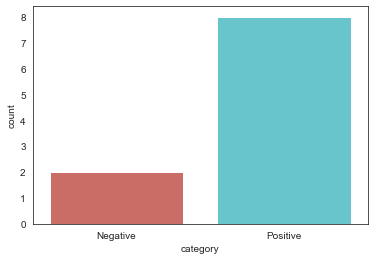

In [71]:
sns.countplot(x='category',data=data,palette='hls')

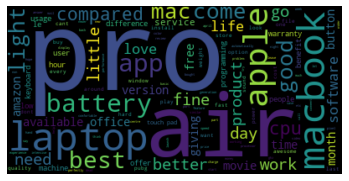

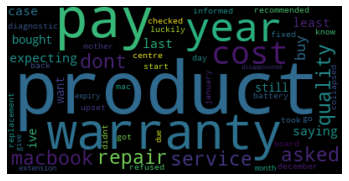

In [72]:
positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Reviews.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Reviews.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()